In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv(r"D:\ms ist\ml project\student-mat.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\ms ist\\ml project\\student-mat.csv'

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os

os.listdir("/content/drive/MyDrive/ml project")


['student+performance']

In [26]:
import os
os.listdir("/content/drive/MyDrive/ml project/student+performance")

['student.zip',
 '.student.zip_old',
 'student-mat.csv',
 'student-por.csv',
 'student-merge.R',
 'student.txt']

In [27]:
import os
os.listdir("/content/drive/MyDrive/ml project/student+performance")

['student.zip',
 '.student.zip_old',
 'student-mat.csv',
 'student-por.csv',
 'student-merge.R',
 'student.txt']

In [15]:
import os

os.path.exists("/content/drive/MyDrive/ml project/student+performance/student.zip")


True

In [17]:
import zipfile

zip_path = "/content/drive/MyDrive/ml project/student+performance/student.zip"
extract_path = "/content/drive/MyDrive/ml project/student+performance/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [28]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ml project/student+performance/student-mat.csv", sep=';', engine='python', quotechar='"')

In [20]:
df.head()


,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [36]:
# Drop duplicates if any
df = df.drop_duplicates()

# Separate features and target
X = df.drop("G3", axis=1)
y = df["G3"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Encode categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [34]:
print(df.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
df.head()

In [35]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ml project/student+performance/student-mat.csv", sep=';', engine='python', quotechar='"')

In [31]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [38]:
df.columns = df.columns.str.strip()


In [39]:
print('G3' in df.columns)  # Should return True


True


In [41]:
X = df.drop("G3", axis=1)
y = df["G3"]


In [44]:
# Drop duplicates if any
df = df.drop_duplicates()

# Separate features and target
X = df.drop("G3", axis=1)
y = df["G3"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Encode categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [45]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# See the first 5 rows of X_train
X_train.head()


X_train shape: (316, 41)
X_test shape: (79, 41)
y_train shape: (316,)
y_test shape: (79,)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
181,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-1.238419,-0.097908,-0.540699,...,True,False,False,False,True,True,True,True,True,True
194,-0.546287,-0.685387,0.440257,0.792251,-1.235351,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,...,False,False,False,False,False,False,True,True,True,False
173,-0.546287,-1.600009,0.440257,-0.643249,-0.042286,3.589323,0.062194,-0.236010,1.700867,-0.540699,...,True,False,False,False,False,True,False,True,True,True
63,-0.546287,1.143856,0.440257,-0.643249,1.150779,-0.449944,-1.054472,0.766399,0.801479,0.583385,...,True,False,True,True,True,True,True,True,True,False
253,-0.546287,-0.685387,-1.399970,0.792251,-1.235351,-0.449944,-1.054472,-0.236010,-0.997295,-0.540699,...,True,False,False,False,False,True,False,True,False,False


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test data
y_pred = lr.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 1.6466656197147505
MSE: 5.656642833231222
R2 Score: 0.7241341236974022


In [52]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [53]:
print("Decision Tree Results")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))


Decision Tree Results
MAE: 1.1265822784810127
MSE: 4.189873417721519
R2 Score: 0.7956662394898885


In [54]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [55]:
print("Random Forest Results")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Results
MAE: 1.180506329113924
MSE: 3.8317544303797475
R2 Score: 0.8131311583783953


In [56]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
})

results


,Model,R2 Score
0,Linear Regression,0.724134
1,Decision Tree,0.795666
2,Random Forest,0.813131


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Linear Regression
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)


Linear Regression MSE: 5.656642833231222
Linear Regression R2: 0.7241341236974022


In [59]:
from sklearn.tree import DecisionTreeRegressor

# Initialize
dt_model = DecisionTreeRegressor(random_state=42)

# Train
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree MSE:", mse_dt)
print("Decision Tree R2:", r2_dt)


Decision Tree MSE: 4.189873417721519
Decision Tree R2: 0.7956662394898885


In [60]:
from sklearn.ensemble import RandomForestRegressor

# Initialize
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)


Random Forest MSE: 3.8317544303797475
Random Forest R2: 0.8131311583783953


In [61]:
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MSE": [mse_lr, mse_dt, mse_rf],
    "R2": [r2_lr, r2_dt, r2_rf]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


               Model       MSE        R2
0  Linear Regression  5.656643  0.724134
1      Decision Tree  4.189873  0.795666
2      Random Forest  3.831754  0.813131


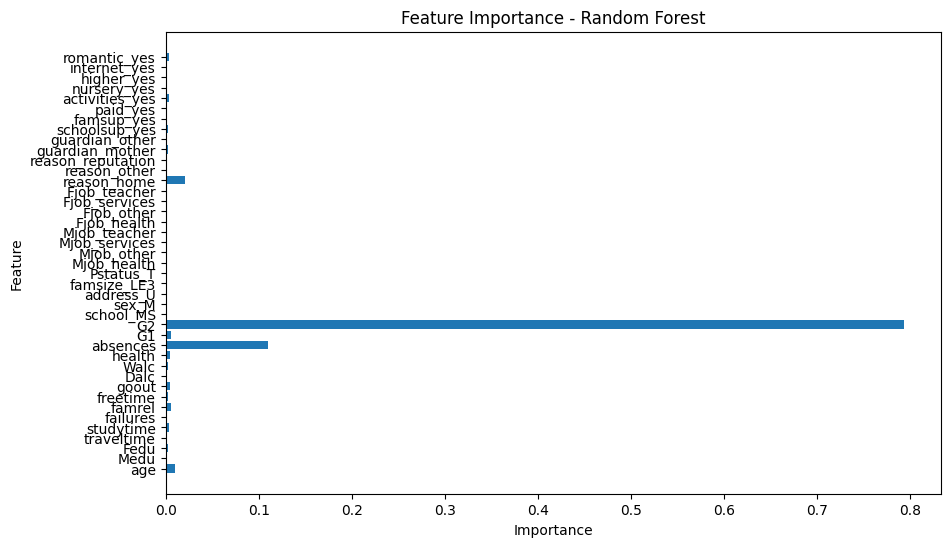

In [62]:
import matplotlib.pyplot as plt

feature_importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, feature_importance)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")
plt.show()


In [63]:
import joblib

# Save model to file
joblib.dump(rf_model, "student_performance_rf_model.pkl")


['student_performance_rf_model.pkl']

In [64]:
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [65]:
def predict_student_grade(input_data):
    # input_data: a pandas DataFrame with same features
    # Scale numerical features
    input_data[numerical_cols] = scaler.transform(input_data[numerical_cols])
    # Encode categorical features if needed (or use same processed dataframe)
    # Predict
    predicted_grade = rf_model.predict(input_data)
    return predicted_grade
